### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 2 June 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 2 June 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_superhosts`
- Team Leader and Team Member 1: `Felix Rosenberger`
- Team Member 2: `John Rizk`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


In [1]:
# Task 1 code here
import pandas as pd

# setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# read in data
trainpath = "train.csv"
df_train = pd.read_csv(trainpath, index_col='ID')
testpath = "test.csv"
df_test = pd.read_csv(testpath, index_col='ID')

# concatenate dataframes to reduce redundancies in operations
df = pd.concat([df_train, df_test])

#df.to_csv("df_1.csv")
#pd.set_option('display.max_rows', None)
#print(df.iloc[1309])
df.head()

,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,city scrape,"The Stables, Richmond",Superbly located hotel style accommodation in ...,Richmond is a great neighbourhood. A beautifu...,Ione,2013-03-16,"Melbourne, Australia",I'm a working mum who loves being able to shar...,within an hour,100%,98%,f,Richmond,2.0,"['email', 'phone']",t,t,"Richmond, Victoria, Australia",Yarra,-37.82030,144.99016,Entire guesthouse,Entire home/apt,2,1 bath,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,2.0,2,1125,1125.0,2.0,1125.0,t,0,0,0,12.0,741,37,1,2013-03-29,2023-02-18,4.88,4.91,4.97,4.94,4.93,4.93,4.82,f,2,2,0,0,6.11,$132.00
1,city scrape,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,100%,98%,f,Brunswick,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,4.0,4,27,27.0,4.0,27.0,t,0,12,22,112.0,169,25,3,2013-01-12,2023-03-08,4.48,4.64,3.97,4.72,4.69,4.65,4.60,f,1,0,1,0,1.37,$39.00
2,city scrape,The Suite @ Angelus Retreat,<b>The space</b><br />Welcome to ANGELUS Retre...,NaN,Margaret Jiin,2011-11-28,"Melbourne, Australia",I have very special interests in Life and Life...,within a few hours,100%,78%,t,NaN,2.0,"['email', 'phone']",t,t,NaN,Yarra Ranges,-37.90546,145.39447,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,2.0,2,365,365.0,2.0,365.0,t,30,60,90,365.0,8,2,0,2015-07-06,2022-06-13,4.75,4.88,4.75,4.88,4.50,5.00,4.75,f,2,2,0,0,0.09,$270.00
3,city scrape,Million Dollar Views Over Melbourne,<b>The space</b><br /><b>Enjoy Million Dollar ...,NaN,Paul,2010-06-13,"Melbourne, Australia",Professional couple who enjoy entertaining in ...,within a day,75%,92%,f,Southbank,4.0,"['email', 'phone']",t,t,NaN,Melbourne,-37.82163,144.96672,Private room in rental unit,Private room,2,2.5 baths,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,1.0,1,730,730.0,1.0,730.0,t,30,60,90,365.0,2,0,0,2011-10-16,2012-01-27,4.50,4.00,4.50,4.00,4.00,5.00,4.00,f,1,0,1,0,0.01,"$1,000.00"
4,city scrape,Melbourne - Old Trafford Apartment,After hosting many guests from all over the wo...,Our street is quiet & secluded but within walk...,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within a few hours,100%,87%,t,NaN,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",NaN,-38.05725,145.33936,Entire rental unit,Entire home/apt,5,1 bath,3.0,3.0,"[""Laundromat nearby"", ""Private patio or balcon...",1,14,1.0,1,14,14.0,1.0,14.0

`(Task 1, Text Here)`
### Forecasting Problem
Aiirbnb is an "online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales." https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp

The goal is this assignment is to develop a model for predicting nightly prices of Melbournd based Airbnb listings with different features and characteristics based on statistical machine learning. The model can be used to assess the how rental prices differ based on specific characteristics of the property or against other suburbs, which can then be used to determine the profitability and feasibilty of certain listings.

### Evaluation Criteria
The criteria to assess prediction performance is RMSE. This performance metric measures the average distance between predictions obtained by a model and actual target values. Thus, the lower the distance (and the smaller RMSE), the better the prediction quality. It also has the advantage of being in the same unit as the predicted variable which makes it easy to interpret.


In [163]:
df = pd.concat([df_train, df_test])
df['price'] = df.price.str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype('float')
d = df.groupby('neighbourhood_cleansed')['price'].describe().round(2)
#d = df.groupby(['property_type','bathrooms'])['price'].describe().round(2)

#d = df.groupby('property_type')['price'].mean().dropna().round(2)
d.sort_values(by=['mean'], inplace=True, ascending=False)
#d.sort_values(by=['count'], inplace=True, ascending=False)
d
#df['price']
print(min(df['price']))
print(max(df['price']))

25.0
145160.0


In [361]:
#df = pd.concat([df_train, df_test])
#df['price'] = df.price.str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype('float')
#d = df.groupby('property_type')['price'].describe().dropna().round(2)
#d = df.groupby('property_type')['price'].mean().dropna().round(2)
#d.sort_values(by=['mean'], inplace=True, ascending=False)
#d.sort_values(by=['count'], inplace=True, ascending=False)
#d



25.0


In [176]:
# data summary and characteristics
df['price'].describe()
#df.info()
#print(len(df.columns))


count      7000.000000
mean        285.649714
std        2325.453324
min          25.000000
25%         117.000000
50%         172.000000
75%         268.000000
max      145160.000000
Name: price, dtype: float64

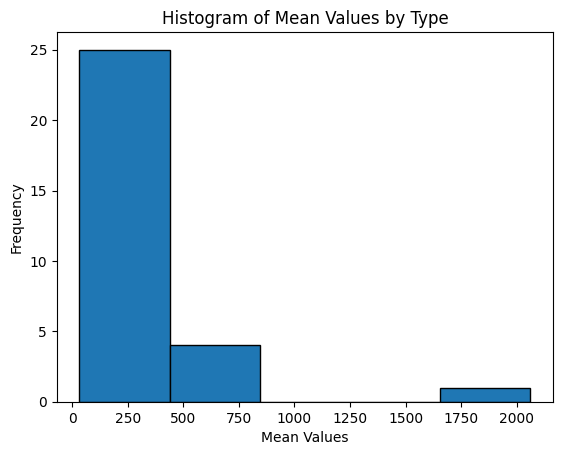

In [179]:
import matplotlib.pyplot as plt

types = ['Melbourne', 'Port Phillip', 'Yarra Ranges', 'Yarra', 'Stonnington', 'Moreland', 'Monash', 'Wyndham', 'Whitehorse', 'Boroondara', 'Darebin', 'Glen Eira', 'Maribyrnong', 'Bayside', 'Hobsons Bay', 'Frankston', 'Kingston', 'Moonee Valley', 'Cardinia', 'Banyule', 'Manningham', 'Casey', 'Hume', 'Knox', 'Brimbank', 'Nillumbik', 'Melton', 'Maroondah', 'Whittlesea', 'Greater Dandenong']
means = [2062, 778, 620, 463, 438, 228, 173, 167, 162, 153, 151, 144, 141, 129, 105, 101, 97, 88, 81, 79, 75, 70, 66, 63, 60, 50, 43, 37, 36, 32]

plt.hist(means, bins=5, edgecolor='black')
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Values by Type')
plt.show()

In [ ]:
# types of variables / features
#vtypes = df.dtypes.to_frame()
#vtypes.value_counts()
#vtypes

#print(df.shape[1])
df.dtypes.value_counts().to_frame()


### Data Summary and Main Characteristics

The data consists of 60 columns, 26 of type object, 18 of type float64 and 16 of type int64 types.
<br>
<br>
The variables types were classified into the following data types, 21 nominal, 12 ordinal and 27 numeric.
<br>
<br>
Evaluation of the prices suggest that the distribution of prices is skewed with the range of prices between <b>25</b> and <b>145160</b> with a mean of <b>285.65</b>.

Prices appear to be sensitive to property type, with <b>Private room in villa</b> having the highest mean price of <b>2358.36</b> by <b>property type</b>, which is much higher than the mean prices of other property types, suggesting that the distribution of prices for this property type may be highly skewed. <b>Private room in bungalow</b> has the lowest mean price of <b>64.11</b>. 

<b>Entire rental unit</b> have the highest listings <b>2984</b>, and a mean price of <b>296.87</b>, which is close to the overall mean price, while <b>Shared room in guesthouse</b> has the least listings <b>2</b>, and a mean price of <b>67.00</b>.

<b>Boroondara</b> has the highest mean price of <b>894.95</b> by <b>neighbourhood_cleansed</b> and <b>Greater Dandenong</b> has the lowest mean price of <b>115.41</b>. Prices also seem sensitive to neighbourhood_cleansed. <b>Melbourne</b> has the highest listing of <b>2062</b>, and mean price of <b>335.35</b>, and <b>Greater Dandenong</b> has the lowest lisitngs of<b>32</b>.

<b>Instant bookable</b> properties have a slighly higher mean price <b>298.96</b> compared with those that are not instant bookable <b>281.34</b>.

<b>Entire home/apt</b> have the highest listing <b>by room type</b> with a mean price of <b>312.19</b>. <b>Hotel room</b> and <b>Shared room</b> have the least lisitings with a combined total of <b>80</b>.

Prices increase as the number of <b>accomodates</b> increases from 1 to 16, ranging from a mean of <b>81.65</b> to <b>724.04</b>. 

Intial review of the features indicates that price dependant variables may include:
<br>&nbsp;&nbsp;room_type (nominal)
<br>&nbsp;&nbsp;neighbourhood_cleansed (nominal)
<br>&nbsp;&nbsp;accommodates (numeric)
<br>&nbsp;&nbsp;bathrooms (numeric)
<br>&nbsp;&nbsp;bedrooms (numeric)
<br>&nbsp;&nbsp;beds (numeric)
<br>&nbsp;&nbsp;amenities (nominal)
<br>&nbsp;&nbsp;review_scores_rating (ordinal)
<br>&nbsp;&nbsp;instant_bookable (nominal)

### Variables / Features

<center><b>Variables by Category</b></center>

#### Nominal
ID<br>
source<br>
name<br>
description<br>
neighborhood_overview<br>
host_name<br>
host_location<br>
host_about<br>
host_response_time<br>
host_is_superhost<br>
host_neighbourhood<br>
host_verifications<br>
host_has_profile_pic<br>
host_identity_verified<br>
neighbourhood<br>
neighbourhood_cleansed<br>
property_type<br>
room_type<br>
amenities<br>
has_availability<br>
instant_bookable<br>

#### Ordinal
host_since<br>
host_acceptance_rate<br>
host_listings_count<br>
first_review<br>
last_review<br>
review_scores_rating<br>
review_scores_accuracy<br>
review_scores_cleanliness<br>
review_scores_checkin<br>
review_scores_communication<br>
review_scores_location<br>
review_scores_value<br>

#### Numeric
host_response_rate<br>
latitude<br>
longitude<br>
accommodates<br>
bathrooms<br>
bedrooms<br>
beds<br>
minimum_nights<br>
maximum_nights<br>
minimum_minimum_nights<br>
maximum_minimum_nights<br>
minimum_maximum_nights<br>
maximum_maximum_nights<br>
minimum_nights_avg_ntm<br>
maximum_nights_avg_ntm<br>
availability_30<br>
availability_60<br>
availability_90<br>
availability_365<br>
number_of_reviews<br>
number_of_reviews_ltm<br>
number_of_reviews_l30d<br>
calculated_host_listings_count<br>
calculated_host_listings_count_entire_homes<br>
calculated_host_listings_count_private_rooms<br>
calculated_host_listings_count_shared_rooms<br>
reviews_per_month<br>
price


### Missing Observations

In [2]:
# missing values
missing_values_count_train = pd.DataFrame(df_train.isnull().sum(axis=0)).loc[df_train.isnull().sum(axis=0) != 0]

missing_values_count_test = pd.DataFrame(df_test.isnull().sum(axis=0)).loc[df_test.isnull().sum(axis=0) != 0]

missing_values_count = pd.merge(missing_values_count_train, missing_values_count_test, how='outer', left_index=True, right_index=True)
missing_values_count.fillna(0, inplace=True)
missing_values_count = missing_values_count.rename(columns={'0_x': 'missing_train', '0_y': 'missing_test'})
missing_values_count['total_missing'] = missing_values_count['missing_train'] + missing_values_count['missing_test']

print('Total Missing records = ', sum(missing_values_count['total_missing']))

missing_values_count
print(sum(

SyntaxError: incomplete input (3668527400.py, line 14)

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [2]:

def replace_string(df, c, s, r='', f='strip'):
    if f == 'find_replace':
        mask = (df[c].notnull()) & (df[c].astype(str).str.contains(s))
        df.loc[mask, c] = df.loc[mask, c].astype(str).str.replace(s, r)
    if f == 'replace':
        df[c] = df[c].replace(s, r)
    elif f == 'strip':
        df[c] = df[c].dropna().astype(str).str.replace(s, r, regex=True)
    return df

def replace_numeric(df, c, n, r=0, f='match'):
    if f == 'isgreater':
        df.loc[df[c] > n, c] = r
    elif f == 'isless':
        df.loc[df[c] < n, c] = r
    elif f == 'match':
        df.loc[df[c] == n, c] = r
    return df

def convert_numeric(df, c, t, d=1):
    df[c] = pd.to_numeric(df[c], errors='coerce')
    if t == 'float':
      df[c] = df[c].astype(t) // d
    df[c] = df[c].astype(t)
    return df


df2 = df


# price
df2 = replace_string(df2, 'price', '$','', 'strip')
df2 = replace_string(df2, 'price', ',','', 'strip')
df2 = convert_numeric(df2, 'price', 'float', 1)

# host_response_rate
df2 = replace_string(df2, 'host_response_rate', '%','', 'strip')
df2 = convert_numeric(df2, 'host_response_rate', 'float', 100)

# host_acceptance_rate
df2 = replace_string(df2, 'host_acceptance_rate', '%','', 'strip')
df2 = convert_numeric(df2, 'host_acceptance_rate', 'float', 100)

# bathrooms
df2 = replace_string(df2, 'bathrooms', 'Half-bath','0.5', 'find_replace')
df2 = replace_string(df2, 'bathrooms', 'half-bath','0.5', 'find_replace')
df2 = replace_string(df2, 'bathrooms', '[^0-9\.]','', 'strip')
df2 = convert_numeric(df2, 'bathrooms', 'float', 1)

# max/min nights - replace extreme values
df2 = replace_numeric(df2, 'maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'minimum_maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'maximum_maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'minimum_nights_avg_ntm', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'maximum_nights_avg_ntm', 9000, 1000, 'isgreater')

# #df2.to_csv("df_2.csv")

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [6]:
df3 = df2

df3 = replace_string(df3, 'host_verifications', "['email']","'1','0','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['phone']","'0','1','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['email', 'phone']","'1','1','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['phone', 'work_email']","'0','1','1'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['email', 'phone', 'work_email']","'1','1','1'", 'replace')

df3[['email', 'phone', 'work_email']] = df3['host_verifications'].str.split(',', expand=True)

df3 = replace_string(df3, 'email', "'",'', 'strip')
df3 = convert_numeric(df3, 'email','int', 1)

df3 = replace_string(df3, 'phone', "'",'', 'strip')
df3 = convert_numeric(df3, 'phone','int', 1)

df3 = replace_string(df3, 'work_email', "'",'', 'strip')
df3 = convert_numeric(df3, 'work_email','int', 1)

#df3.drop(['host_verifications'], axis=1, inplace=True)


# def onehot(df, c):
#         for col in c:
#             df = df.join(pd.get_dummies(df[[col]], drop_first=True))
#             df.drop([col], axis=1, inplace=True)
#         return df



In [7]:
df3.to_csv("df_3.csv")

In [ ]:
# df1['email'] = df1['host_verifications'].str.extract(r'^(email)$')
# df1['phone'] = df1['host_verifications'].str.extract(r'^(phone)$')
# df1['work_email'] = df1['host_verifications'].str.extract(r'^(work_email)$')
# print(df1['email'].unique())
print(df1['xxx'])

`(Task 2, Question 2 Text Here)`

In [ ]:

df1

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [ ]:
## Task 2, Question 3 Code Here

`(Task 2, Question 3 Text Here)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [ ]:
## Task 2, Question 4 Code Here

`(Task 2, Question 4 Text Here)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [ ]:
## Task 2, Question 5 Code Here

`(Task 2, Question 5 Text Here)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [ ]:
## Task 2, Question 6 Code Here

`(Task 2, Question 6 Text Here)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [ ]:
#Task 3 code here

`(Task 3 - insert more cells as required)`